In [1]:
import yaml
import pandas as pd
import numpy as np
import datetime as dt
import re


from functions import (drop_duplicates,
                       concat_dataframes,
                       remove_all_punctuation,
                       drop_irrelevant_columns,
                       standardize_column_names,
                       filter_by_regex_pattern,
                       standardize_dates
                       )


# config = None  # <-- Initialize config
# try:
#     with open("../config.yaml", "r") as file:
#         config = yaml.safe_load(file)
# except:
#     print("Yaml configuration file not found!")
# config

In [2]:

df_demo = pd.read_csv("../data/raw/df_final_demo.txt", delimiter=",")


df_demo.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [3]:
df_experiment = pd.read_csv("../data/raw/df_final_experiment_clients.txt", delimiter=",")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [4]:

df_web_data_1 = pd.read_csv("../data/raw/df_final_web_data_pt_1.txt", delimiter=",")
df_web_data_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [5]:
df_web_data_2 = pd.read_csv("../data/raw/df_final_web_data_pt_2.txt", delimiter=",")
df_web_data_2.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
5,6019349,442094451_91531546617,154620534_35331068705_522317,start,2017-06-01 11:57:54
6,4726500,934350987_45569789638,467318052_88159801968_565608,confirm,2017-06-05 17:38:52
7,4726500,934350987_45569789638,467318052_88159801968_565608,step_3,2017-06-05 17:38:33
8,4726500,934350987_45569789638,467318052_88159801968_565608,step_2,2017-06-05 17:37:31
9,4726500,934350987_45569789638,467318052_88159801968_565608,step_1,2017-06-05 17:37:24


In [6]:
df_web_data = pd.concat([df_web_data_1, df_web_data_2], axis=0)
df_web_data 

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
print("df_demo columns:", df_demo.columns.tolist())
print("df_experiment columns:", df_experiment.columns.tolist())


df_demo columns: ['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
df_experiment columns: ['client_id', 'Variation']


In [8]:
df_demo.columns = df_demo.columns.str.strip().str.lower()
df_experiment.columns = df_experiment.columns.str.strip().str.lower()
df_demo.columns = df_demo.columns.str.lower()

In [9]:
print(df_demo.columns.tolist())
print(df_experiment.columns.tolist())


['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
['client_id', 'variation']


In [10]:
merged_df_demo_experiment = pd.merge(df_demo, df_experiment, on= "client_id")
merged_df_demo_experiment

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [12]:
merged_df_demo_experiment_clean = merged_df_demo_experiment.dropna(subset=['variation'])
merged_df_demo_experiment_clean

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [13]:
merged_df_demo_experiment_clean = merged_df_demo_experiment_clean.dropna(subset=['clnt_age'])
merged_df_demo_experiment_clean

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

In [14]:
merged_df_demo_experiment_clean.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50487.000000,50487.000000,5.048700e+04,50487.000000,50487.000000
mean,5.006180e+06,12.031810,150.416365,47.319795,2.254580,1.495168e+05,3.093272,6.131856
std,2.877445e+06,6.860326,81.945403,15.518616,0.533675,3.020390e+05,2.188009,2.175441
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515688e+06,6.000000,82.000000,33.500000,2.000000,3.987718e+04,1.000000,4.000000
50%,5.025043e+06,11.000000,136.000000,48.000000,2.000000,6.573433e+04,3.000000,6.000000
75%,7.477922e+06,16.000000,192.000000,59.500000,2.000000,1.399583e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [ ]:
# Overall
#Age:The average client age is 47.3 years old, the minimum is 17 and the maximum is 96. 
#Accounts:The average client holds approximately 2.25 accounts (minimum of 1 and maximum of 7) [and holds an average balance of 149,516.8 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).]
#Tenure:In average the clients have been with Vanguard for 12.03 years or 150.41 months (maximum of 55 or 669 and minimum of 2 or 33).
#Calls: In average the clients have called 3.09 times (max. 6 and min. 0)
#Logon: In average the clients have logged in on the platform 6.13 times (max. 9 and min.3)
#Balance: In average each client has 149,516.8 X (max. 16,320,040 and min. 23,789.44)

In [16]:
merged_df_demo_experiment_clean_test = merged_df_demo_experiment_clean[merged_df_demo_experiment_clean['variation'] == "Test"]
merged_df_demo_experiment_clean_test = merged_df_demo_experiment_clean_test.reset_index(drop=True)
merged_df_demo_experiment_clean_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
2,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
3,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
4,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test
...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,Test
26957,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
26958,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
26959,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [17]:
merged_df_demo_experiment_clean_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.696100e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999639e+06,11.982901,149.852899,47.163922,2.249917,1.489626e+05,3.061941,6.101851
std,2.877510e+06,6.844947,81.783390,15.514461,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516570e+06,6.000000,82.000000,33.500000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.500000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.470213e+06,15.000000,191.000000,59.500000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [ ]:
# Test Group
#Age:The average client age on the test group is 47.16 years old, the minimum is 17 and the maximum is 96. 
#Accounts:The average client holds approximately 2.25 accounts (minimum of 1 and maximum of 7) and holds an average balance of 149,516.8 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#Tenure:In average the clients have been with Vanguard for 6.84 years or 150 month (maximum of 55 or 669 and minimum of 2 or 33).
#Calls: In average the clients have called 3.06 times (max. 6 and min. 0)
#Logon: In average the clients have logged in on the platform 6.13 times (max. 9 and min.3)
#Balance: In average each client has 148,962.6 X (max. 16,320,040 and min. 23,789.44)

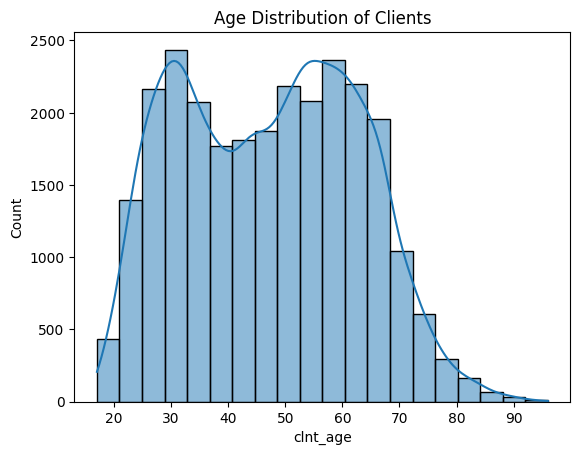

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean_test['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

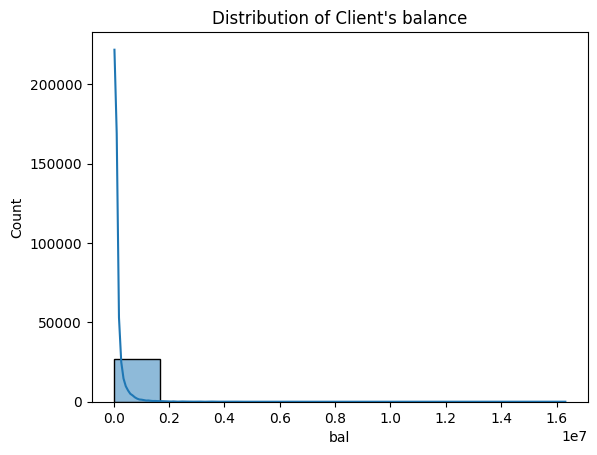

In [40]:
sns.histplot(merged_df_demo_experiment_clean_test['bal'], bins=10
             , kde=True)
plt.title("Distribution of Client's balance")
plt.show()

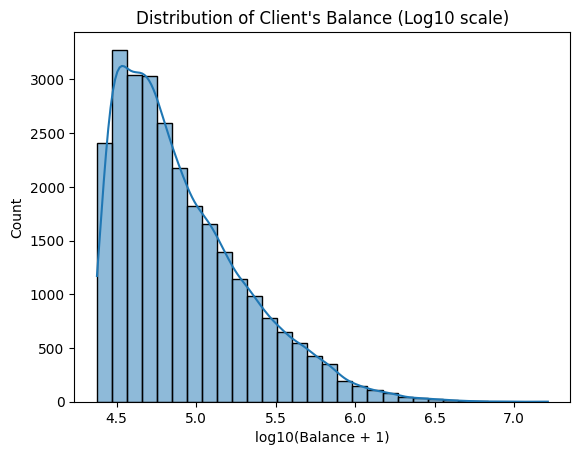

In [41]:
sns.histplot(np.log10(merged_df_demo_experiment_clean_test['bal'] + 1), bins=30, kde=True)
plt.title("Distribution of Client's Balance (Log10 scale)")
plt.xlabel("log10(Balance + 1)")
plt.ylabel("Count")
plt.show()

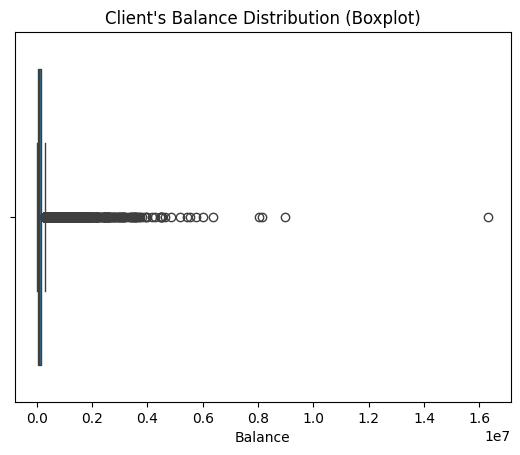

In [42]:
sns.boxplot(x=merged_df_demo_experiment_clean_test['bal'])
plt.title("Client's Balance Distribution (Boxplot)")
plt.xlabel("Balance")
plt.show()

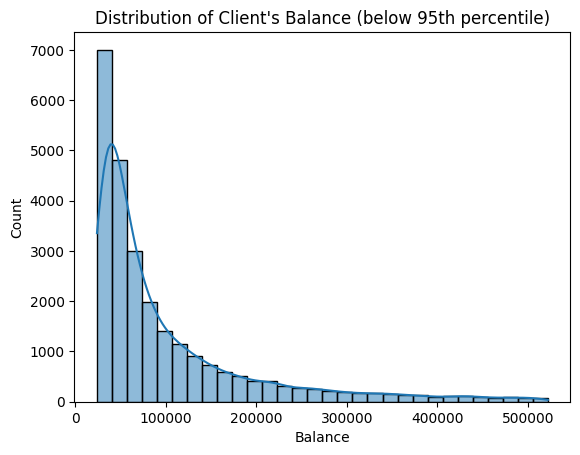

In [44]:
# without 5 percent outliers


p95 = merged_df_demo_experiment_clean_test['bal'].quantile(0.95)

sns.histplot(
    merged_df_demo_experiment_clean_test[merged_df_demo_experiment_clean_test['bal'] <= p95]['bal'], 
    bins=30, kde=True
)
plt.title("Distribution of Client's Balance (below 95th percentile)")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.show()

In [ ]:
sns.countplot(x="calls_6_mnth", data=merged_df_demo_experiment_clean_test)
plt.title("Number of Calls in the Last 6 Months")
plt.xlabel("Calls (times)")
plt.ylabel("Number of Clients")
plt.show()

In [45]:
# sns.histplot(merged_df_demo_experiment_clean_test['num_accts'], bins=15
#              , kde=True)
# plt.title("Distribution of number of Client's accounts")
# plt.show()

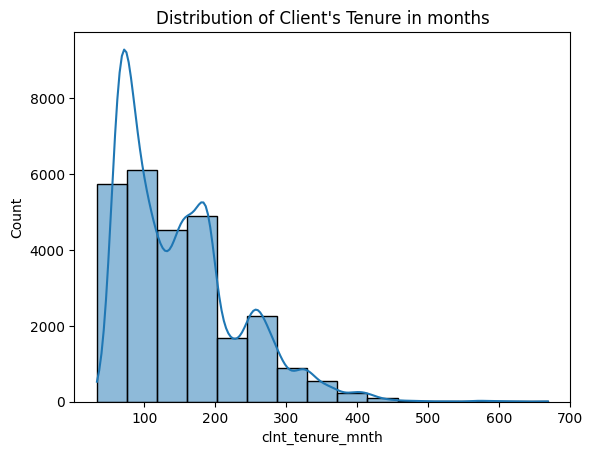

In [37]:
sns.histplot(merged_df_demo_experiment_clean_test['clnt_tenure_mnth'], bins=15
             , kde=True)
plt.title("Distribution of Client's Tenure in months")
plt.show()

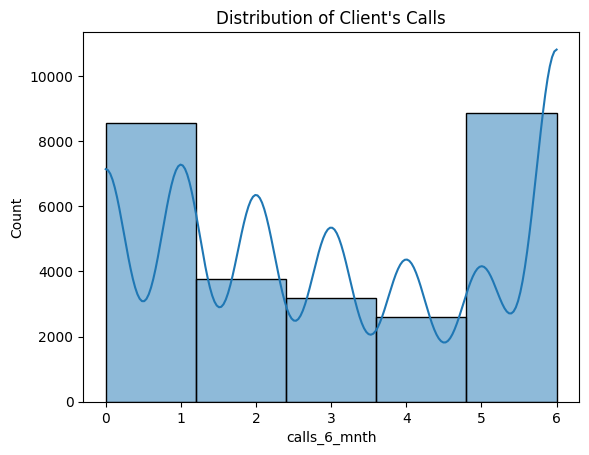

In [38]:
sns.histplot(merged_df_demo_experiment_clean_test['calls_6_mnth'], bins=5
             , kde=True)
plt.title("Distribution of Client's Calls")
plt.show()

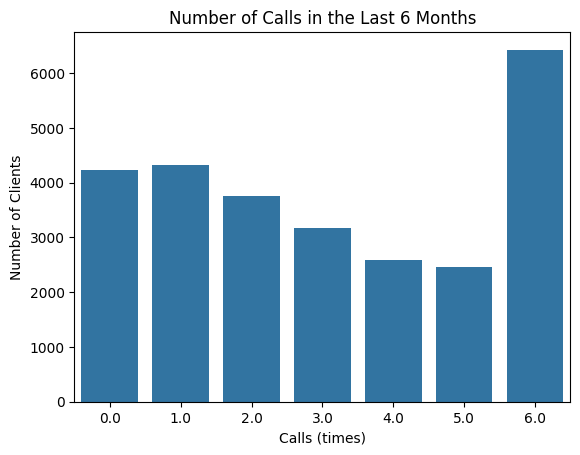

In [35]:
sns.countplot(x="calls_6_mnth", data=merged_df_demo_experiment_clean_test)
plt.title("Number of Calls in the Last 6 Months")
plt.xlabel("Calls (times)")
plt.ylabel("Number of Clients")
plt.show()

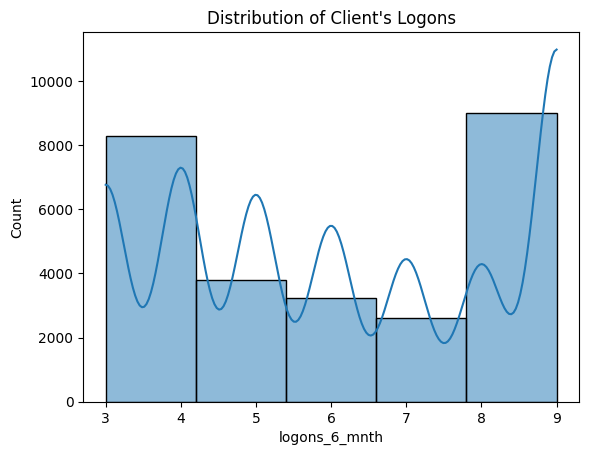

In [39]:
sns.histplot(merged_df_demo_experiment_clean_test['logons_6_mnth'], bins=5
             , kde=True)
plt.title("Distribution of Client's Logons")
plt.show()

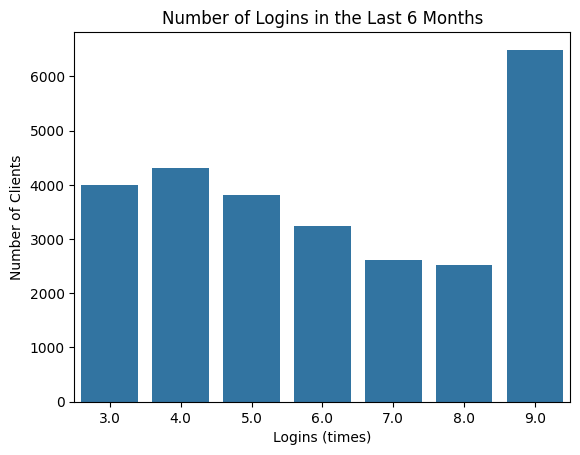

In [34]:
sns.countplot(x="logons_6_mnth", data=merged_df_demo_experiment_clean_test)
plt.title("Number of Logins in the Last 6 Months")
plt.xlabel("Logins (times)")
plt.ylabel("Number of Clients")
plt.show()

In [ ]:
# merged_df_demo_experiment_clean_control = merged_df_demo_experiment_clean[merged_df_demo_experiment_clean['Variation'] == "Control"]
# merged_df_demo_experiment_clean_control= merged_df_demo_experiment_clean_control.reset_index(drop=True)
# merged_df_demo_experiment_clean_control

In [ ]:
# merged_df_demo_experiment_clean_control.describe()

In [ ]:
#Control group
#The average client age on the control group is 47 years old, the minimum is 17 and the maximum is 96. 
#The average client holds approximately 2.26 accounts (minimum of 1 and maximum of 7) and holds an average balance of 150,151.9 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#In average the clients have been with Vanguard for 12.09 years or 151.06 months (maximum of 55 or 669 and minimum of 2 or 33). 

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.histplot(merged_df_demo_experiment_clean_control['clnt_age'], bins=20, kde=True)
# plt.title("Age Distribution of Clients")
# plt.show()

In [ ]:
# merged_df_experiment_web_data = pd.merge(df_experiment, df_web_data, on='client_id')
# merged_df_experiment_web_data

In [ ]:
# merged_df_experiment_web_data_clean = merged_df_experiment_web_data.dropna(subset=['Variation'])
# merged_df_experiment_web_data_clean

In [ ]:
# merged_df_experiment_web_data_clean["visitor_id"].value_counts()

In [ ]:
# merged_df_experiment_web_data_clean["process_step"].unique()